<a href="https://colab.research.google.com/github/Me-lab-c/Brainwave_Matrix_Intern/blob/main/Welcome_To_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset safely
file_path = "/content/Walmart_Sales.csv"

try:
    df = pd.read_csv(file_path)
    print("Dataset loaded successfully.")
except Exception as e:
    print(f"Error loading dataset: {e}")
    exit()

# Display basic information about the dataset
print("\nDataset Information:")
print(df.info())

Dataset loaded successfully.

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB
None


In [ ]:
# Display first few rows
print("\nFirst 5 Rows of Dataset:")
print(df.head())



First 5 Rows of Dataset:
   Store        Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0      1  05-02-2010    1643690.90             0        42.31       2.572   
1      1  12-02-2010    1641957.44             1        38.51       2.548   
2      1  19-02-2010    1611968.17             0        39.93       2.514   
3      1  26-02-2010    1409727.59             0        46.63       2.561   
4      1  05-03-2010    1554806.68             0        46.50       2.625   

          CPI  Unemployment  
0  211.096358         8.106  
1  211.242170         8.106  
2  211.289143         8.106  
3  211.319643         8.106  
4  211.350143         8.106  


In [ ]:
# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())

# Handle missing values (drop or fill)
df = df.dropna()



Missing Values:
Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64


In [ ]:
# Convert 'Date' column to datetime format if it exists
if 'Date' in df.columns:
    try:
        df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
        print("\nDate column converted successfully.")
    except Exception as e:
        print(f"Error converting Date column: {e}")



Date column converted successfully.


In [ ]:
# Check column types
print("\nColumn Data Types:")
print(df.dtypes)

# Generate basic statistics
print("\nDescriptive Statistics:")
print(df.describe())

# Select only numeric columns for analysis
numeric_df = df.select_dtypes(include=['number'])


Column Data Types:
Store                    int64
Date            datetime64[ns]
Weekly_Sales           float64
Holiday_Flag             int64
Temperature            float64
Fuel_Price             float64
CPI                    float64
Unemployment           float64
dtype: object

Descriptive Statistics:
             Store                           Date  Weekly_Sales  Holiday_Flag  \
count  6435.000000                           2565  6.435000e+03   6435.000000   
mean     23.000000  2011-05-29 11:47:22.105263104  1.046965e+06      0.069930   
min       1.000000            2010-01-10 00:00:00  2.099862e+05      0.000000   
25%      12.000000            2010-10-09 00:00:00  5.533501e+05      0.000000   
50%      23.000000            2011-05-08 00:00:00  9.607460e+05      0.000000   
75%      34.000000            2012-02-03 00:00:00  1.420159e+06      0.000000   
max      45.000000            2012-12-10 00:00:00  3.818686e+06      1.000000   
std      12.988182                           

In [ ]:
print(df.columns)

Index(['Store', 'Date', 'Weekly_Sales', 'Holiday_Flag', 'Temperature',
       'Fuel_Price', 'CPI', 'Unemployment'],
      dtype='object')


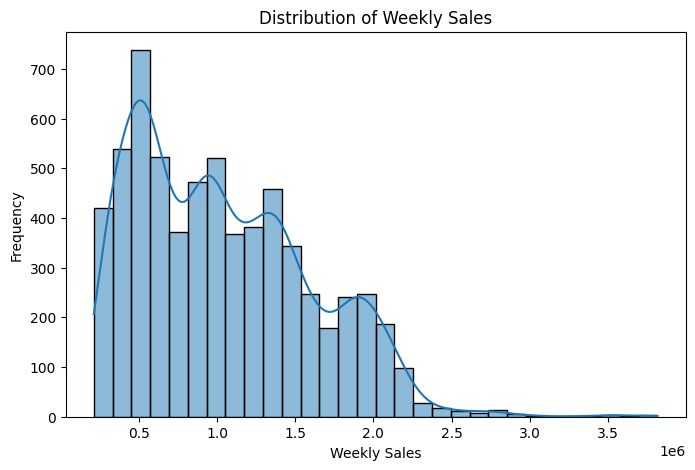

In [ ]:
# 1. Sales Distribution Histogram
if 'Weekly_Sales' in df.columns:
    plt.figure(figsize=(8,5))
    sns.histplot(df['Weekly_Sales'], bins=30, kde=True)
    plt.title("Distribution of Weekly Sales")
    plt.xlabel("Weekly Sales")
    plt.ylabel("Frequency")
    plt.show()
else:
    print("\n'Sales' column not found. Skipping Sales distribution plot.")

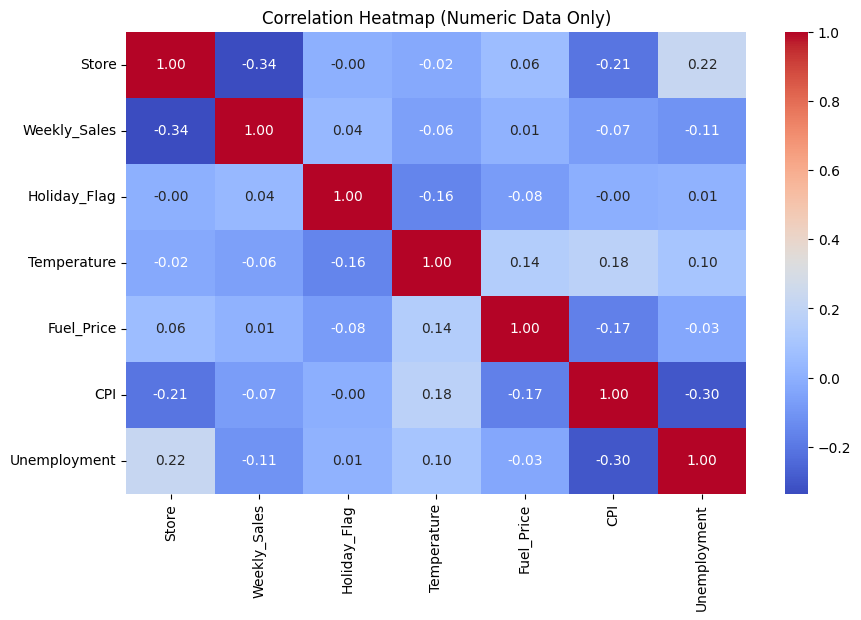

In [ ]:
# 2. Correlation Heatmap
if not numeric_df.empty:
    plt.figure(figsize=(10,6))
    sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
    plt.title("Correlation Heatmap (Numeric Data Only)")
    plt.show()
else:
    print("\nNo numeric columns available for correlation analysis.")

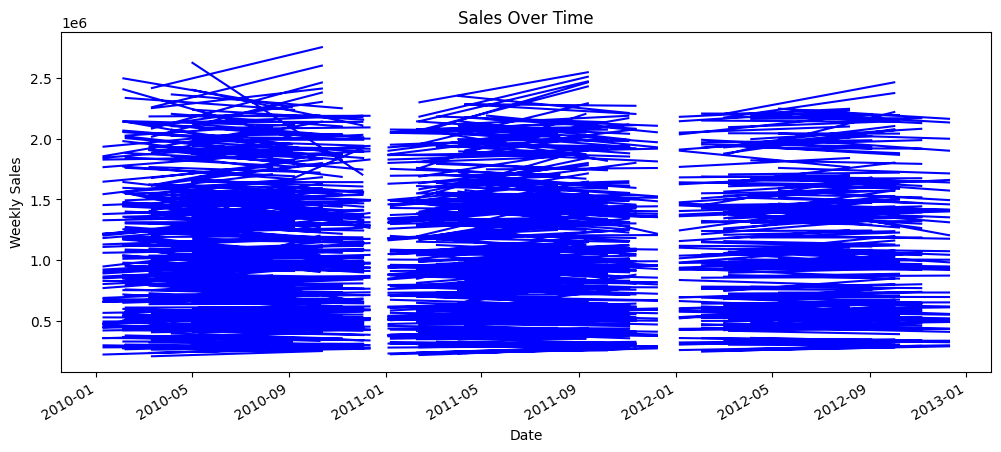

In [ ]:
# 3. Sales Over Time Line Chart
if 'Date' in df.columns and 'Weekly_Sales' in df.columns:
    df.set_index('Date', inplace=True)
    plt.figure(figsize=(12,5))
    df['Weekly_Sales'].plot(title="Sales Over Time", color='blue')
    plt.xlabel("Date")
    plt.ylabel("Weekly Sales")
    plt.show()
else:
    print("\nSkipping time-series analysis. 'Date' or 'Weekly Sales' column not found.")

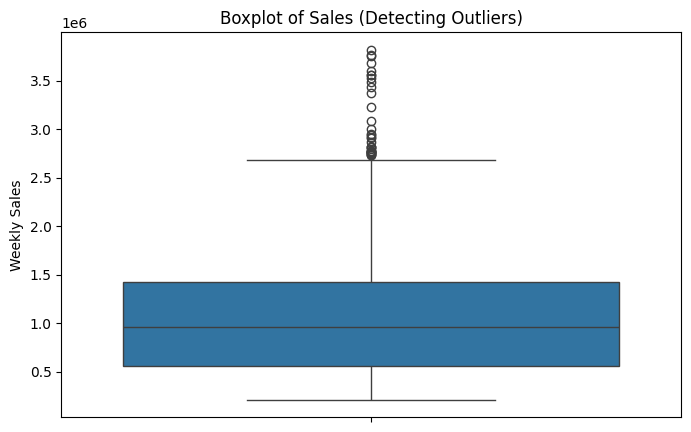

In [ ]:
# 4. Boxplot to Identify Outliers
if 'Weekly_Sales' in df.columns:
    plt.figure(figsize=(8,5))
    sns.boxplot(y=df['Weekly_Sales'])
    plt.title("Boxplot of Sales (Detecting Outliers)")
    plt.ylabel("Weekly Sales")
    plt.show()

In [ ]:
# 5.Select categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns

if len(categorical_cols) > 0:
    for col in categorical_cols:
        plt.figure(figsize=(10, 5))
        count_data = df[col].value_counts()

        if len(count_data) > 30:  # Skip if too many unique values
            print(f"Skipping '{col}' as it has too many unique values.")
            continue

        sns.barplot(x=count_data.index, y=count_data.values)
        plt.title(f"Distribution of {col}")
        plt.xlabel(col)
        plt.ylabel("Count")
        plt.xticks(rotation=45)
        plt.show()
else:
    print("No categorical columns found for visualization.")

No categorical columns found for visualization.


In [ ]:
#checking for the categorical columns
print("Categorical Columns:", categorical_cols)
for col in categorical_cols:
    print(f"Unique values in {col}:", df[col].nunique())

Categorical Columns: Index([], dtype='object')


In [ ]:
#converting numeric categorical columns
df['Store'] = df['Store'].astype(str)
df['Holiday_Flag'] = df['Holiday_Flag'].astype(str)

In [ ]:
categorical_cols = df.select_dtypes(include=['object']).columns
print("Categorical Columns:", categorical_cols)

Categorical Columns: Index(['Store', 'Holiday_Flag'], dtype='object')


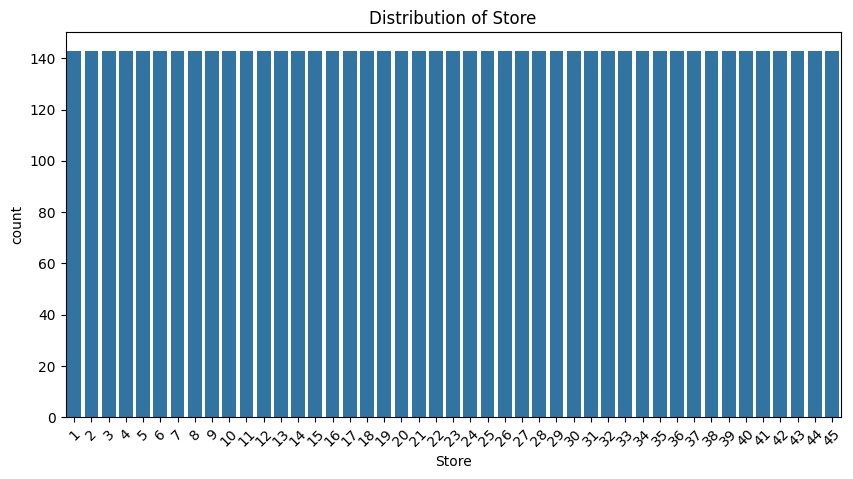

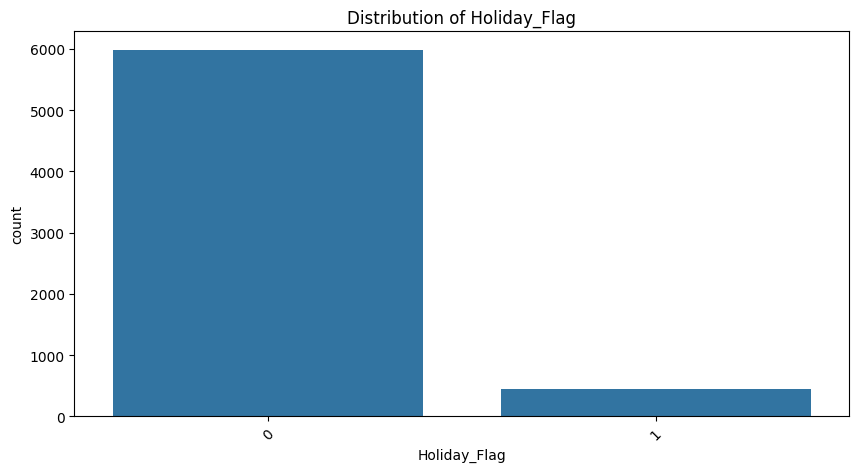

In [ ]:
#5.visualizing
if len(categorical_cols) > 0:
    for col in categorical_cols:
        plt.figure(figsize=(10, 5))
        sns.countplot(x=df[col])
        plt.title(f"Distribution of {col}")
        plt.xticks(rotation=45)
        plt.show()
else:
    print("No categorical columns found for visualization.")

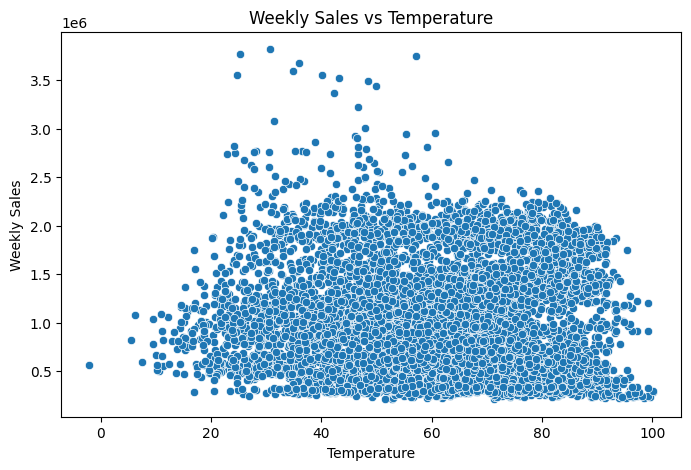

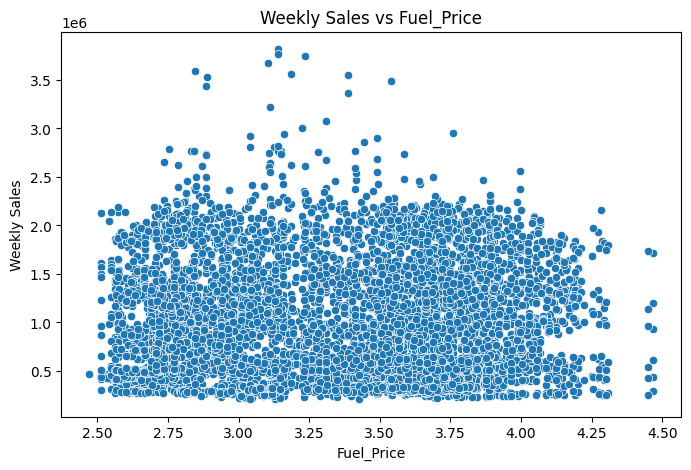

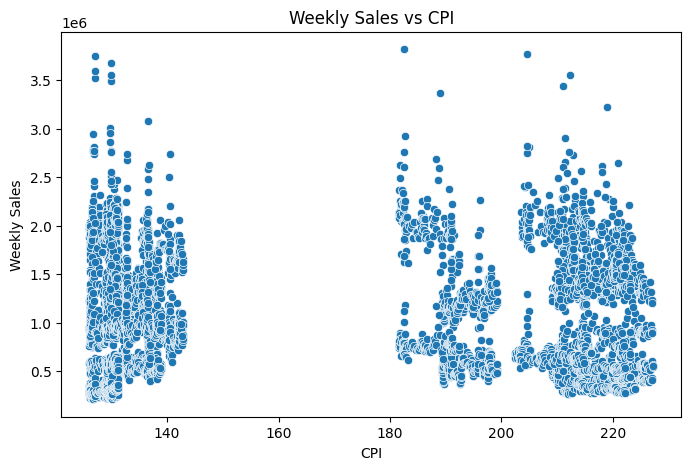

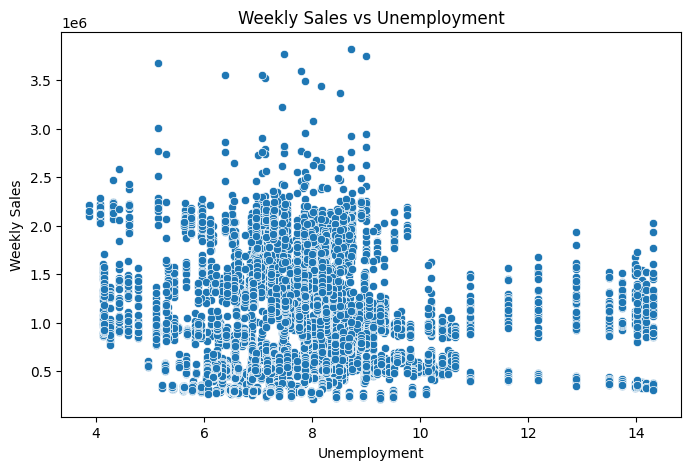

In [ ]:
#6. Scatter Plots (Weekly sales vs other numeric features)
if 'Weekly_Sales' in df.columns and len(df.select_dtypes(include=['number']).columns) > 1:

    numeric_df = df.select_dtypes(include=['number'])  # Select only numeric columns

    for col in numeric_df.columns:
        if col != 'Weekly_Sales':  # Corrected comparison (use != instead of :=)
            plt.figure(figsize=(8,5))
            sns.scatterplot(x=df[col], y=df['Weekly_Sales'])  # Ensure column exists
            plt.title(f"Weekly Sales vs {col}")
            plt.xlabel(col)
            plt.ylabel("Weekly Sales")
            plt.show()
else:
    print("Required columns not found or insufficient numeric columns.")

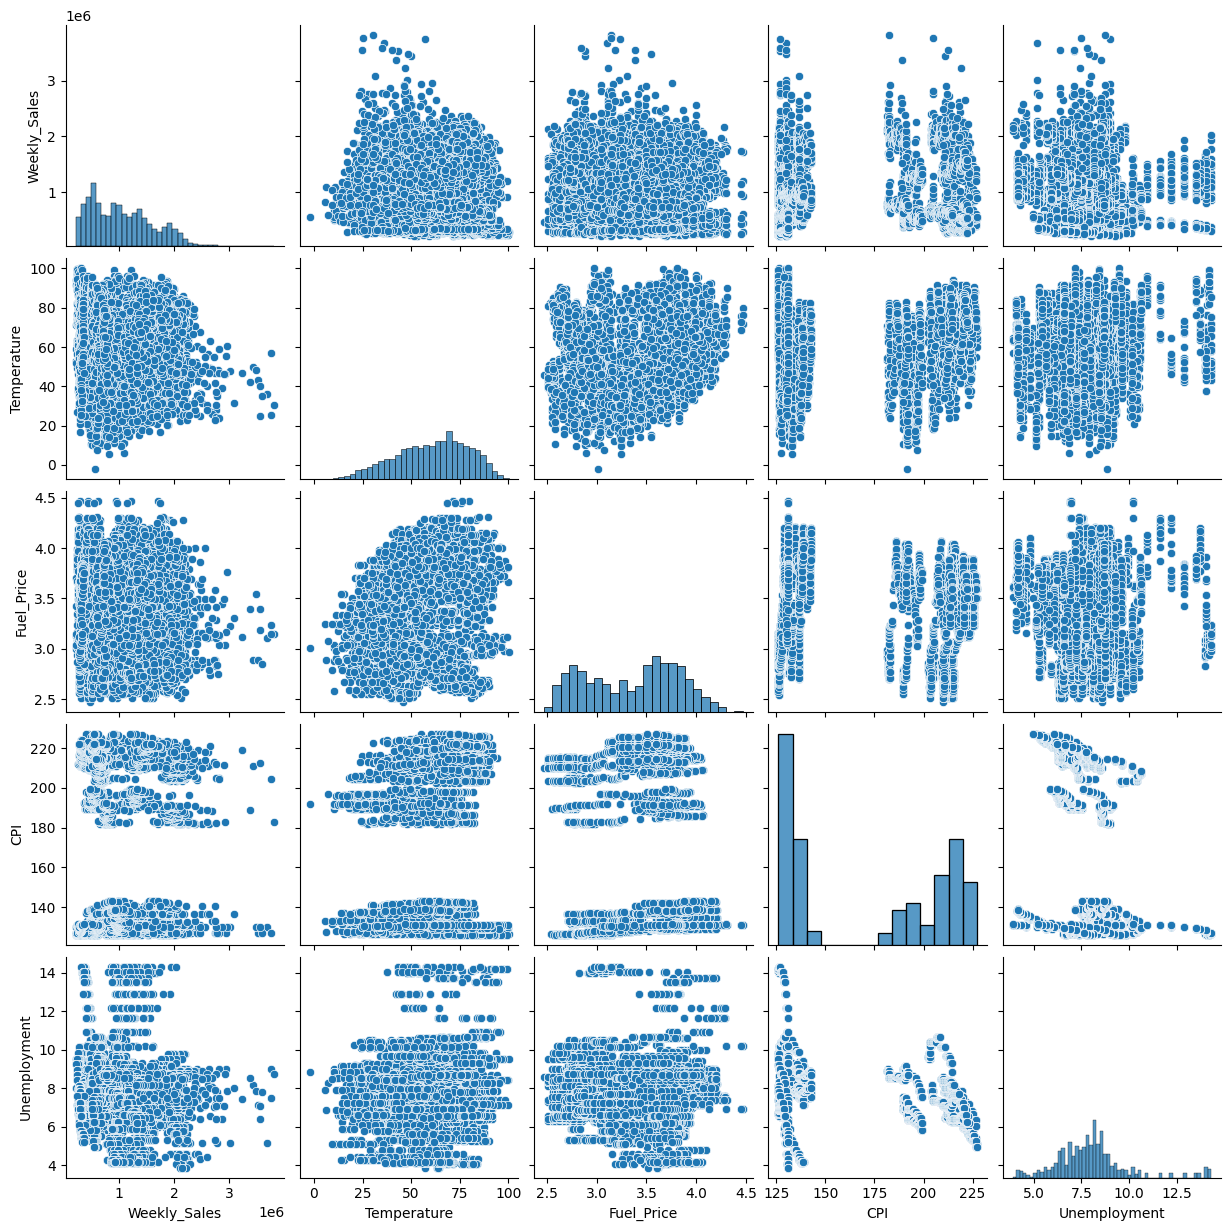

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
# 7. Pairplot to visualize relationships between multiple numeric variables
if not numeric_df.empty:
    sns.pairplot(numeric_df)
    plt.show()
else:
  print("No numeric columns available for pairplot analysis.")


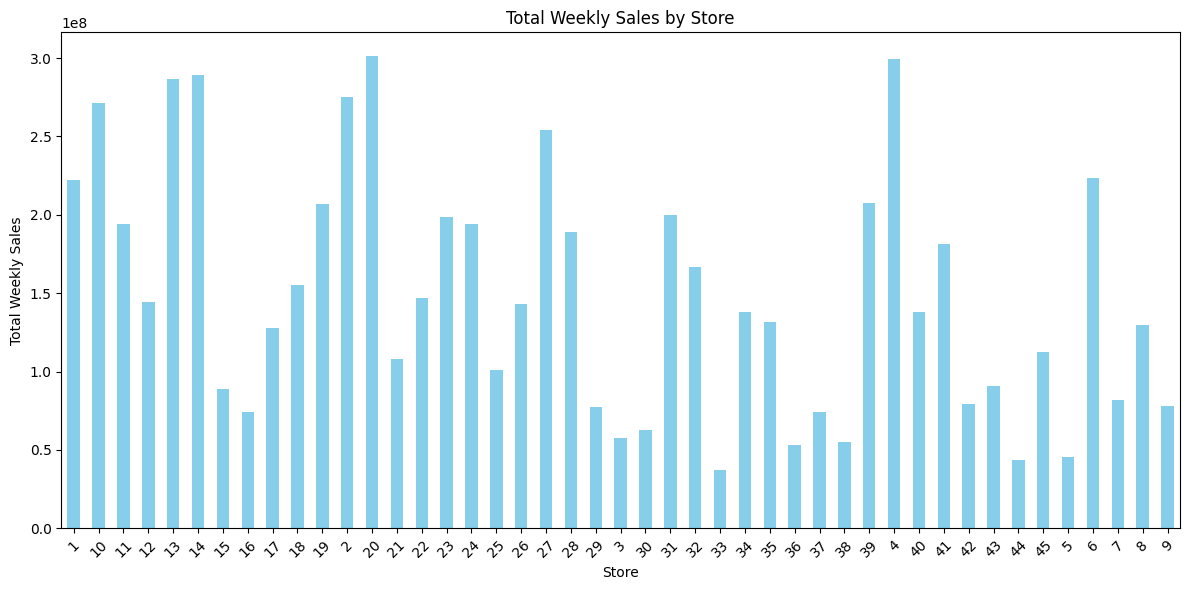

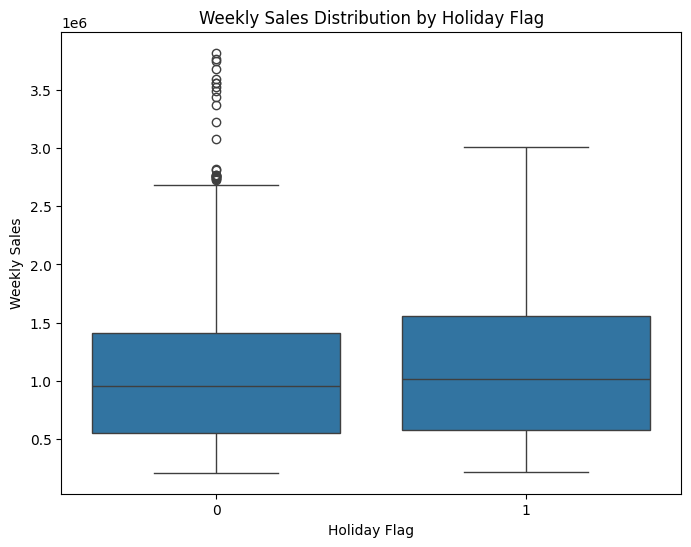

'Date' or 'Weekly_Sales' column not found or not in the correct format. Skipping Yearly Sales Trend.


In [ ]:
import numpy as np
import IPython.display as display
from matplotlib import pyplot as plt
import io
import base64
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#8. Sales by Store (Bar Chart)
if 'Store' in df.columns and 'Weekly_Sales' in df.columns:
    sales_by_store = df.groupby('Store')['Weekly_Sales'].sum()
    plt.figure(figsize=(12, 6))
    sales_by_store.plot(kind='bar', color='skyblue')
    plt.title('Total Weekly Sales by Store')
    plt.xlabel('Store')
    plt.ylabel('Total Weekly Sales')
    plt.xticks(rotation=45)
    plt.tight_layout()  # Adjust layout to prevent labels from overlapping
    plt.show()
else:
    print("'Store' or 'Weekly_Sales' column not found. Skipping Sales by Store chart.")


# 9.  Boxplot of Sales by Holiday Flag
if 'Holiday_Flag' in df.columns and 'Weekly_Sales' in df.columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='Holiday_Flag', y='Weekly_Sales', data=df)
    plt.title('Weekly Sales Distribution by Holiday Flag')
    plt.xlabel('Holiday Flag')
    plt.ylabel('Weekly Sales')
    plt.show()
else:
    print("'Holiday_Flag' or 'Weekly_Sales' column not found. Skipping Boxplot by Holiday Flag.")

